In [1]:
!pip install boto3

     |████████████████████████████████| 102kB 3.6MB/s 
     |████████████████████████████████| 7.3MB 7.5MB/s 
     |████████████████████████████████| 81kB 6.5MB/s 
     |████████████████████████████████| 153kB 31.6MB/s 
  Created wheel for boto3: filename=boto3-1.17.38-py2.py3-none-any.whl size=128781 sha256=a7d1479fbf649b09fd2fdd3b07a946db5cd304a8ae236d44600bb052021c440c
  Stored in directory: /root/.cache/pip/wheels/40/59/2f/4fc3696290086c35649ae117aeae909fca093baaf6eb54f244
Successfully built boto3
ERROR: requests 2.23.0 has requirement urllib3!=1.25.0,!=1.25.1,<1.26,>=1.21.1, but you'll have urllib3 1.26.4 which is incompatible.
ERROR: datascience 0.10.6 has requirement folium==0.2.1, but you'll have folium 0.8.3 which is incompatible.
  Found existing installation: urllib3 1.24.3
    Uninstalling urllib3-1.24.3:
      Successfully uninstalled urllib3-1.24.3


/usr/local/lib/python3.7/dist-packages/requests/__init__.py:91: RequestsDependencyWarning: urllib3 (1.26.4) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


Magic Johnson


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,77.0,72.0,36.3,0.530,0.226,0.81,7.7,7.3,2.4,0.5,18.0
1,37.0,35.0,37.1,0.532,0.176,0.76,8.6,8.6,3.4,0.7,21.6
2,78.0,77.0,38.3,0.537,0.207,0.76,9.6,9.5,2.7,0.4,18.6
3,79.0,79.0,36.8,0.548,0.000,0.80,8.6,10.5,2.2,0.6,16.8
4,67.0,66.0,38.3,0.565,0.207,0.81,7.3,13.1,2.2,0.7,17.6


Michael Jordan


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,82.0,82.0,38.3,0.515,0.173,0.845,6.5,5.9,2.4,0.8,28.2
1,18.0,7.0,25.1,0.457,0.167,0.840,3.6,2.9,2.1,1.2,22.7
2,82.0,82.0,40.0,0.482,0.182,0.857,5.2,4.6,2.9,1.5,37.1
3,82.0,82.0,40.4,0.535,0.132,0.841,5.5,5.9,3.2,1.6,35.0
4,81.0,81.0,40.2,0.538,0.276,0.850,8.0,8.0,2.9,0.8,32.5


Kobe Bryant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,71.0,6.0,15.5,0.417,0.375,0.819,1.9,1.3,0.7,0.3,7.6
1,79.0,1.0,26.0,0.428,0.341,0.794,3.1,2.5,0.9,0.5,15.4
2,50.0,50.0,37.9,0.465,0.267,0.839,5.3,3.8,1.4,1.0,19.9
3,66.0,62.0,38.2,0.468,0.319,0.821,6.3,4.9,1.6,0.9,22.5
4,68.0,68.0,40.9,0.464,0.305,0.853,5.9,5.0,1.7,0.6,28.5


Kevin Durant


,Games played,Games started,Minutes per game,Field goal percentage,3-point field-goal percentage,Free-throw percentage,Rebounds per game,Assists per game,Steals per game,Blocks per game,Points per game
0,80.0,80.0,34.6,0.430,0.288,0.873,4.4,2.4,1.0,0.9,20.3
1,74.0,74.0,39.0,0.476,0.422,0.863,6.5,2.8,1.3,0.7,25.3
2,82.0,82.0,39.5,0.476,0.365,0.900,7.6,2.8,1.4,1.0,30.1
3,78.0,78.0,38.9,0.462,0.350,0.880,6.8,2.7,1.1,1.0,27.7
4,66.0,66.0,38.6,0.496,0.387,0.860,8.0,3.5,1.3,1.2,28.0


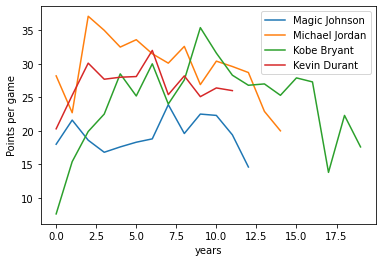

In [2]:
import bs4
import requests
import pandas as pd
import numpy as np
import boto3
import matplotlib.pyplot as plt
from IPython.display import display

def get_basketball_stats(link='https://en.wikipedia.org/wiki/Michael_Jordan'):
    response = requests.get(link)
    soup = bs4.BeautifulSoup(response.text, 'html.parser')
    table = soup.find(class_='wikitable sortable')

    headers = table.tr
    titles = headers.find_all('abbr')
    data = {title['title']: [] for title in titles}

    for row in table.find_all('tr')[1:]:
        for key, a in zip(data.keys(),row.find_all('td')[2:]):
            data[key].append(''.join(c for c in a.text if (c.isdigit() or c == '.')))

        Min = min([len(x) for x in data.values()])
        for key in data.keys():
            data[key] = list(map(lambda x: float(x), data[key][:Min]))
    return data

links = ['https://en.wikipedia.org/wiki/Magic_Johnson'\
         ,'https://en.wikipedia.org/wiki/Michael_Jordan'\
       ,'https://en.wikipedia.org/wiki/Kobe_Bryant'\
      
      ,'https://en.wikipedia.org/wiki/Kevin_Durant']
player_names = ['Magic Johnson','Michael Jordan','Kobe Bryant','Kevin Durant']

magic_johnson_dict = get_basketball_stats(links[0])
michael_jordan_dict  = get_basketball_stats(links[1])
kobe_bryant_dict  = get_basketball_stats(links[2])
kevin_durant_dict = get_basketball_stats(links[3])

mj_table = pd.DataFrame(magic_johnson_dict)
mij_table = pd.DataFrame(michael_jordan_dict)
kb_table = pd.DataFrame(kobe_bryant_dict)
kd_table = pd.DataFrame(kevin_durant_dict)

list_table =[mj_table, mij_table, kb_table, kd_table]

i = 0
for name in player_names:
    print(name)
    display(list_table[i].head())
    i += 1

j = 0
for name in player_names:
    plt.plot(list_table[j][['Points per game']],label=name)
    plt.legend()
    plt.xlabel('years')
    plt.ylabel('Points per game')

    j += 1

csv_name = 'nba.csv'
mj_table.to_csv(csv_name)

